## Week 10 - Exercise 1 
### Fourier analysis of Atlanta temperature 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load data, extract time and July temperature for Atlanta

In [73]:
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)
# convert pandas data frame to numpy matrix
data=df.to_numpy()
year=data[:,0] # get time
TMP_ATL_JUL=data[:,7] # get July temperature
TMP_ATL_JUL

array([79.6, 79.2, 81.1, 75.9, 80.1, 77.7, 78.8, 76.7, 77.8, 79.1, 78.5,
       78.1, 75.4, 76.4, 80.6, 76.2, 77. , 78.2, 78.4, 77.9, 79.2, 78.8,
       80.3, 80.3, 78.4, 77. , 77.9, 76. , 80.1, 77.8, 77.2, 76.7, 76.1,
       77.1, 79.5, 79.1, 78.7, 76.3, 78. , 76.5, 77.3, 77.3, 78.7, 77.8,
       77.1, 78.2, 80.9, 78.5, 77.6, 78.8, 77.7, 81.3, 81. , 80.6, 77.3,
       79.9, 79.7, 81.2, 79.5, 79.2, 80.3, 77.2, 80. , 80.4, 79.9, 78.3,
       79.2, 77.8, 77. , 80.1, 79.8, 77.5, 79.1, 82. , 78.7, 82.1, 79.1,
       79.3, 79. , 78.7, 79.1, 80.3, 76.3, 78.5, 75.8, 76.5, 76.6, 78.2,
       74.1, 77.6, 80.8, 78.6, 76.3, 76.7, 78.9, 77.8, 76.4, 76.4, 79.5,
       78.6, 78.8, 85.1, 82.2, 79.1, 81.4, 76.8, 78.3, 84.1, 81. , 80.5,
       79.8, 80.5, 80.9, 80.2, 85.3, 79.1, 84.3, 81.8, 78.8, 80.7, 79.1,
       81.4, 78.6, 80.4, 77.9, 79.5, 79.4, 81. , 78.4, 79.8, 78.1, 82.3,
       82.4, 83.8, 77.5, 77.9, 81.3, 83.4, 81.2, 80.8, 82.2, 82.1])

### make a simple plot of July temperature

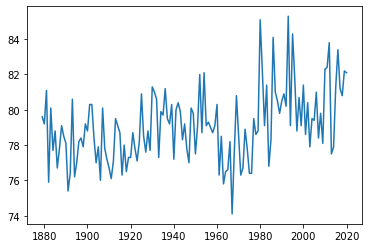

In [20]:
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL)
plt.show()

In [143]:
x=year
y=TMP_ATL_JUL
N = np.size(x)     # number of data points
dT= 1.0             # data points are 1 year apart
T = x[N-1]-x[0]+dT  # the length of data record
T

142.0

### set up Fourier coefficients

In [150]:
# --------- set the number of coeffs to calculate 
K=np.ceil((N+1)/2).astype(int) # set K = N/2
print(K)
# --------
A=np.zeros((K,1))
B=np.zeros((K,1))
for n in range(0,K):
    cosn=np.cos(2*np.pi*n*x/T)   # cosine function of period T/n
    sinn=np.sin(2*np.pi*n*x/T)   # sine function of period T/n    
    A[n]=2/T*y.T@cosn*dT # take the inner product to get A
    B[n]=2/T*y.T@sinn*dT # take the inner product to get B

72


### assemble the Fourier series

In [151]:
x=year
yest=A[0]/2*np.ones((N))
for n in range(1,K):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest=yest+A[n]*cosn+B[n]*sinn

### plot the prediction from fourier series

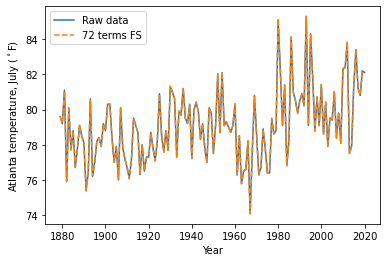

In [152]:
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL,label='Raw data')
plt.plot(x,yest,'--',label=str(K)+' terms FS')

plt.xlabel('Year')
plt.ylabel('Atlanta temperature, July ($^\circ$F)')
plt.legend()

fn='Fig_ATL_temp_FS'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")

plt.show()

### plot the prediction using K<=10
smooth data using FT filter

In [153]:
x=year
yest2=A[0]/2*np.ones((N))
for n in range(1,10):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest2=yest2+A[n]*cosn+B[n]*sinn

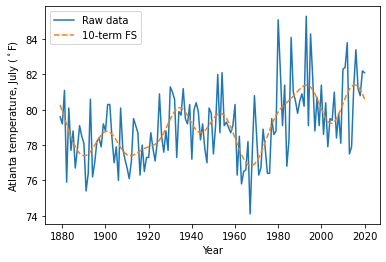

In [154]:
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL,label='Raw data')
plt.plot(x,yest2,'--',label='10-term FS')

plt.xlabel('Year')
plt.ylabel('Atlanta temperature, July ($^\circ$F)')
plt.legend()


fn='Fig_ATL_temp_FS_10term'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")

plt.show()